<a href="https://colab.research.google.com/github/Piyumi22/UCSD-Microgrid-Database/blob/master/PVGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.Importing the Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA on PV data

#1. pandas profiling

In [25]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 60.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1d18c7a9253469343afc46554edb8ddd36a1a27195d104c9e06e329531d15991
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [26]:
import os
import pandas as pd
import pandas_profiling

# Specify the path to the folder in Google Drive for saving the reports
output_folder = '/content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/pandas profiling reports/PVGenerator'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Specify the path to the folder containing the CSV files
folder_path = '/content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/Data Files/PVGenerator'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# List to store the URL links
url_links = []

# Loop through the files and perform desired operations
for file_name in file_list:
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Create the file path
        file_path = os.path.join(folder_path, file_name)

        # Read the CSV file using pandas
        df = pd.read_csv(file_path)

        # Generate pandas profiling report
        profile = pandas_profiling.ProfileReport(df)

        # Specify the file name for the report
        report_name = f"{file_name}_profile_report.html"

        # Construct the full file path for the report in the output folder
        report_path = os.path.join(output_folder, report_name)

        # Save the profile report as an HTML file
        profile.to_file(report_path)

        # Create the URL link to the report in Google Drive
        url_link = f'file://{report_path}'

        # Add the URL link to the list
        url_links.append(url_link)

# Print the URL links
print("HTML links generated:")
for link in url_links:
    print(link)


<ipython-input-26-4455310a4cda>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

HTML links generated:
file:///content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/pandas profiling reports/PVGenerator/CSC_BuildingPV.csv_profile_report.html
file:///content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/pandas profiling reports/PVGenerator/EBU2_A_PV.csv_profile_report.html
file:///content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/pandas profiling reports/PVGenerator/EBU2_B_PV.csv_profile_report.html
file:///content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/pandas profiling reports/PVGenerator/ElectricShopPV.csv_profile_report.html
file:///content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/pandas profiling reports/PVGenerator/GarageFleetsPV.csv_profile_report.html
file:///content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/pandas profiling reports/PVGenerator/GilmanParkingPV.csv_profile_report.html
file:///content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/pandas profil

# 2.Data preparation


##2.1 filewise box plot

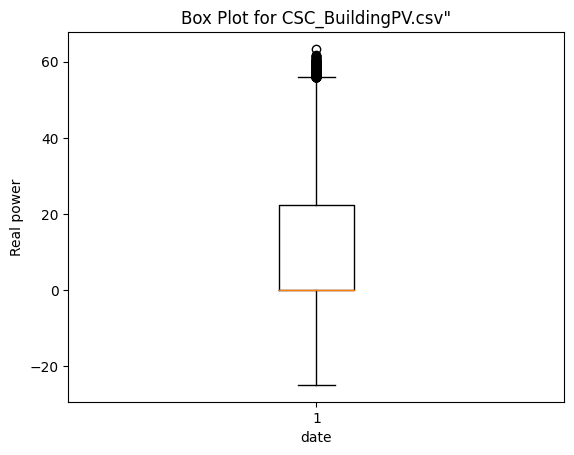

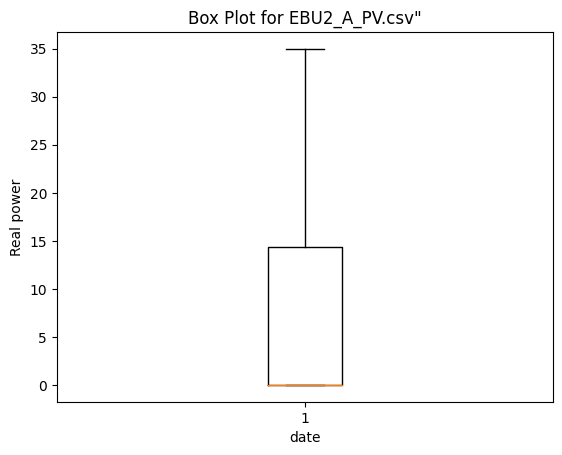

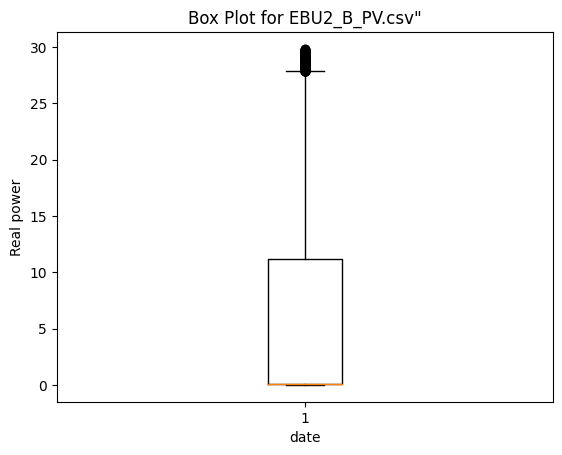

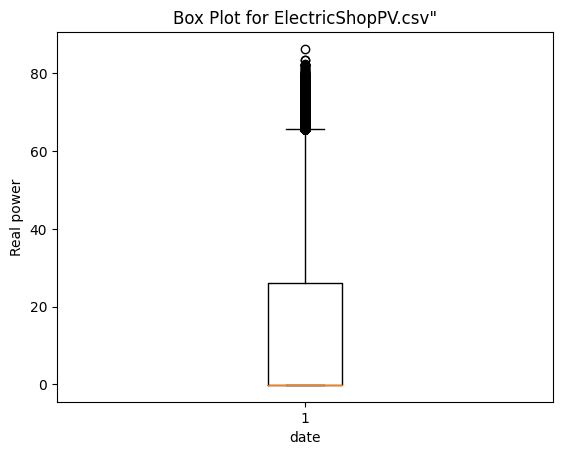

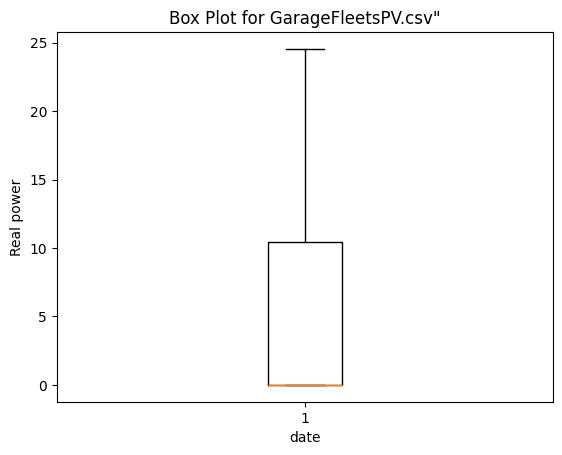

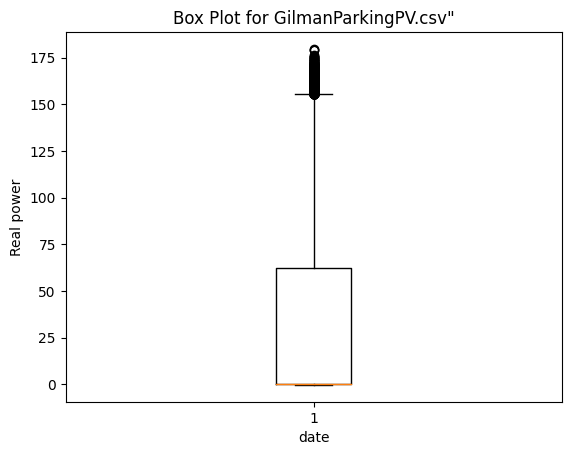

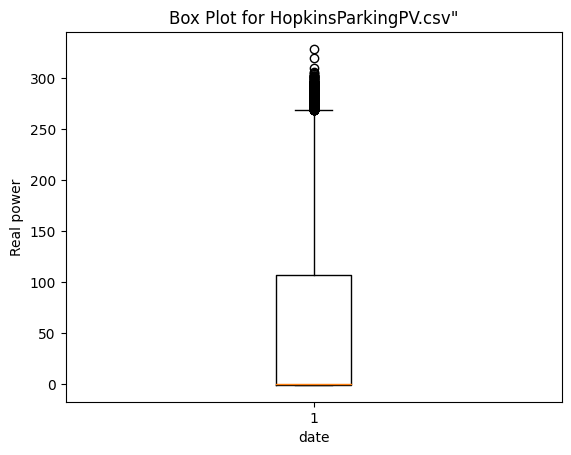

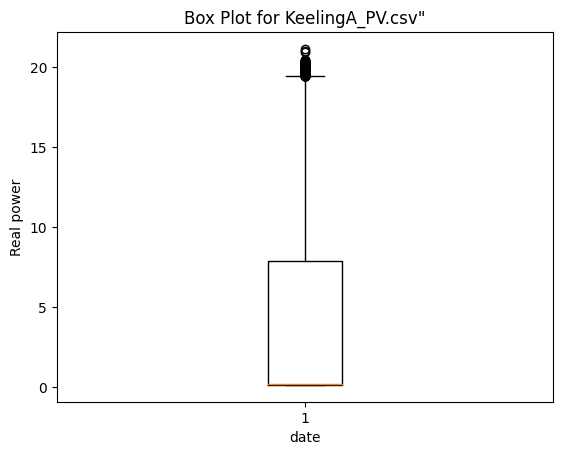

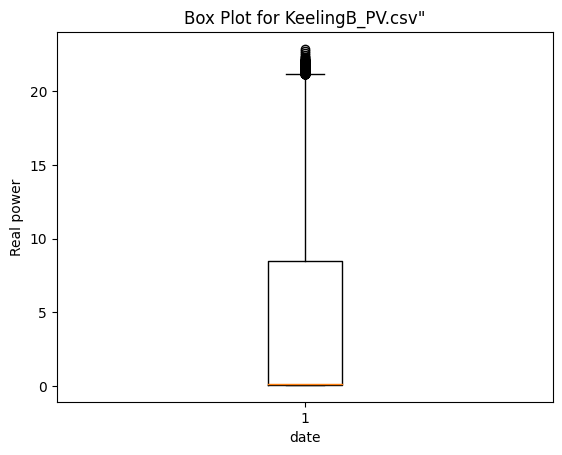

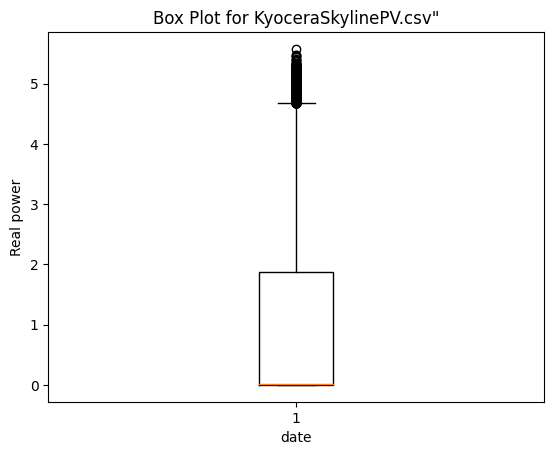

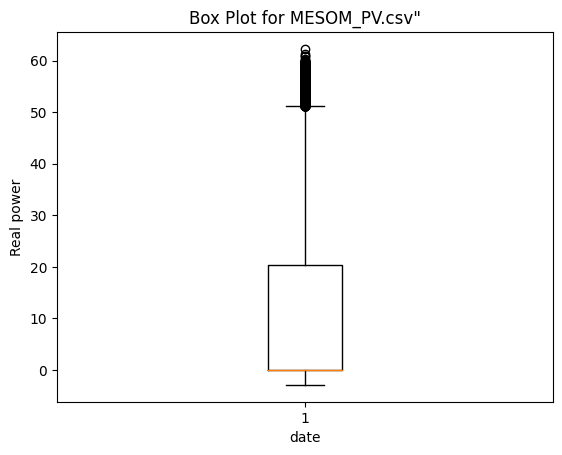

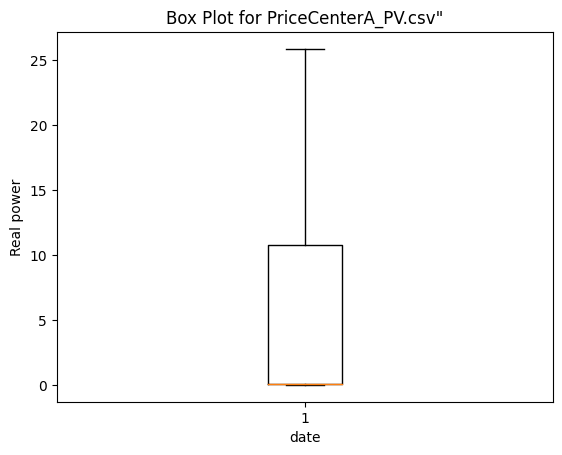

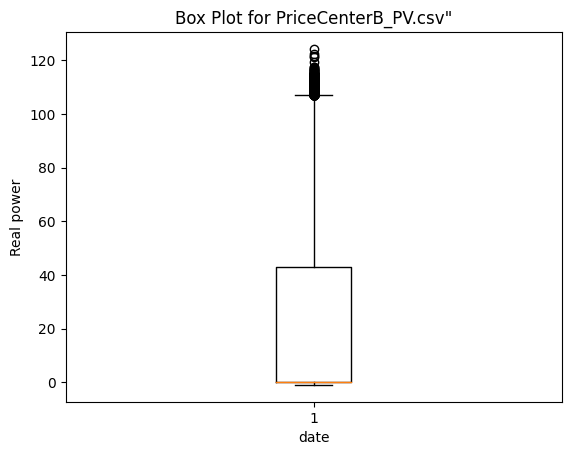

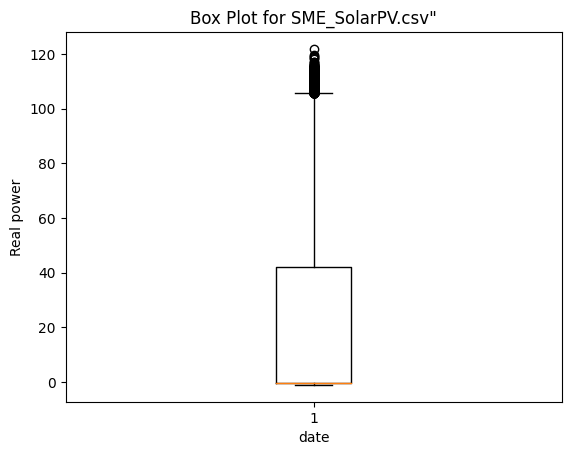

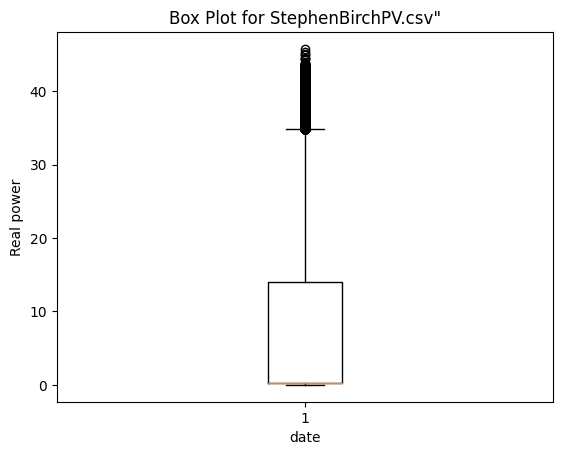

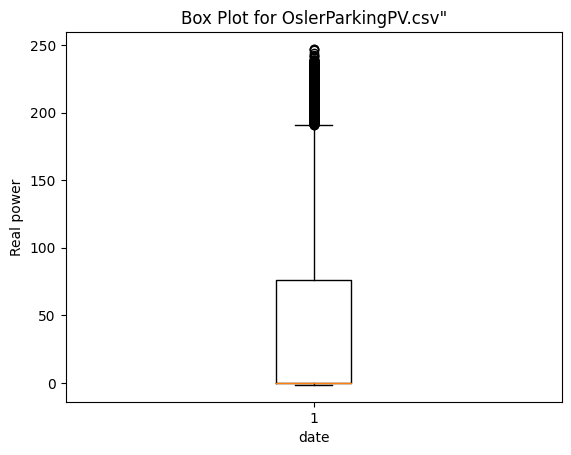

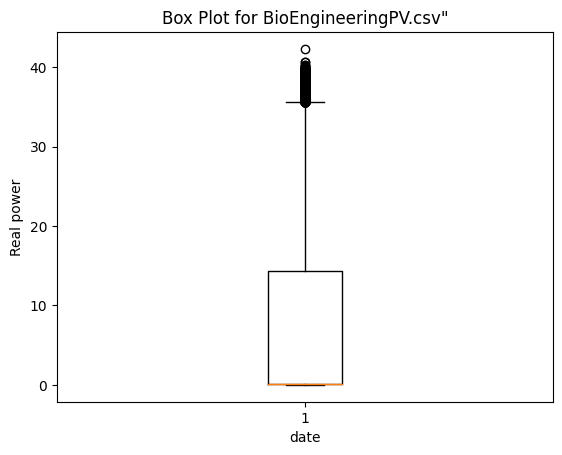

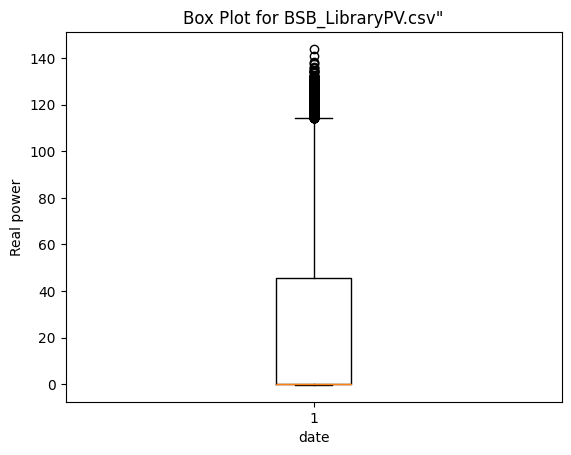

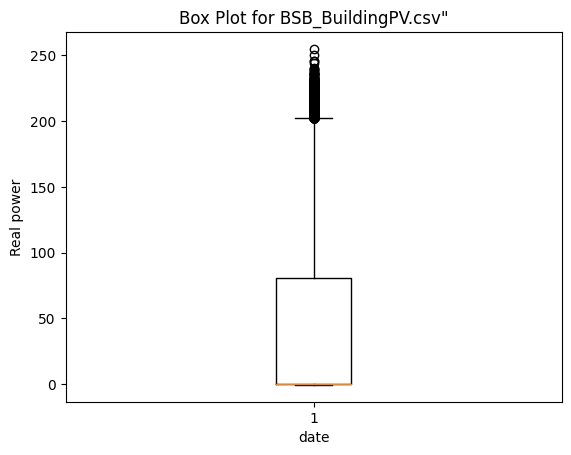

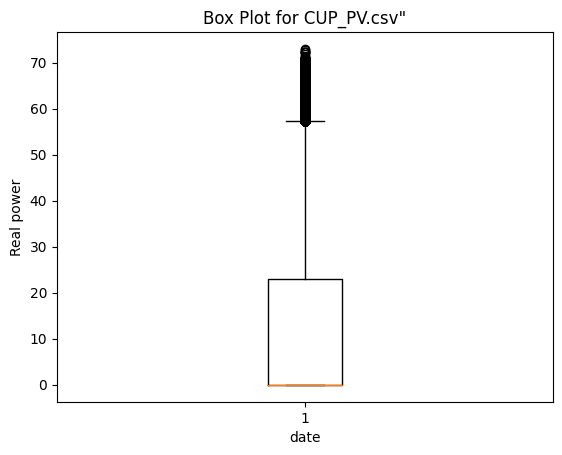

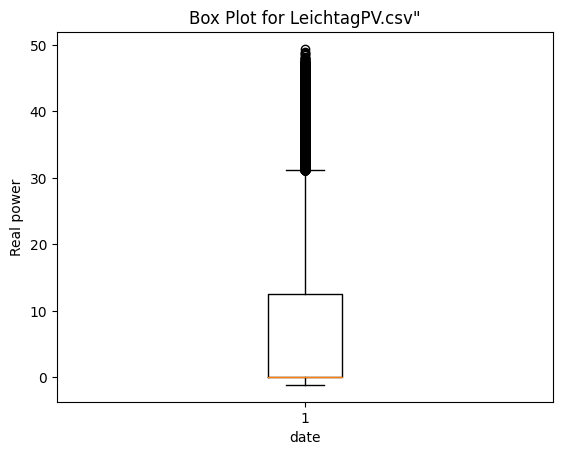

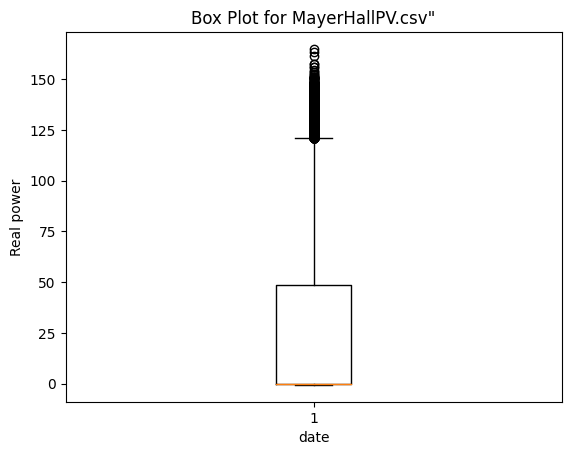

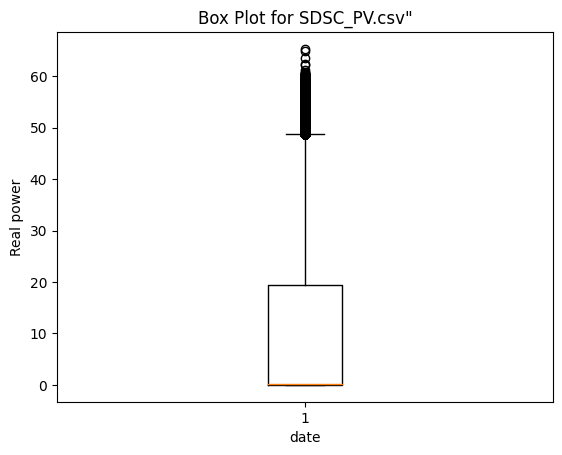

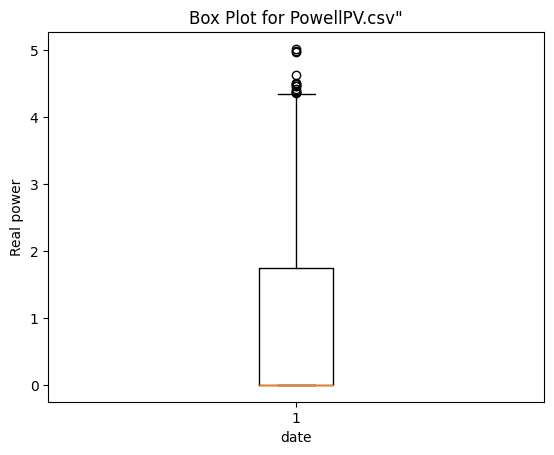

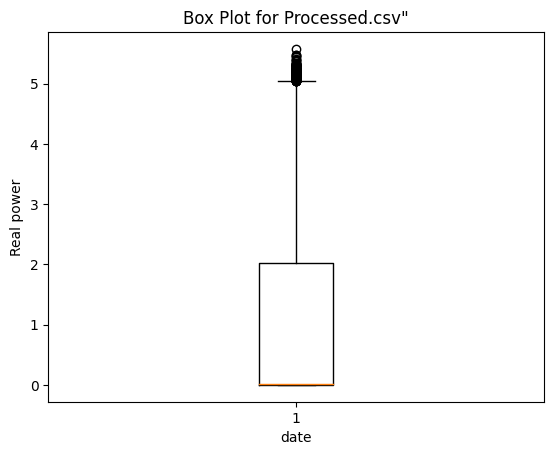

In [27]:
# Specify the path to the folder in your Google Drive
folder_path = '/content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/Data Files/PVGenerator'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)
data = []  # List to store the data from each file

#add the data from each file to the list
for file_name in file_list:
    if file_name.endswith('.csv'):

            file_path = os.path.join(folder_path, file_name)
                # Read the CSV file using pandas
            df = pd.read_csv(file_path)

            # Extract the column of interest from the DataFrame
            column_name = 'RealPower'  # Replace with the name of the column you want to plot
            column_data = df[column_name]

            # Plotting
            plt.boxplot(column_data)
            plt.xlabel('date')
            plt.ylabel('Real power')
            plt.title(f'Box Plot for {file_name}"')
            plt.show()

            data.append(df)

#Concatenate the data from all the files into a single DataFrame
combined_data = pd.concat(data)


##2.2 combined data box plot

In [28]:
import os
import pandas as pd
import plotly.graph_objects as go

# Specify the path to the folder containing the CSV files
folder_path = '/content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/Data Files/PVGenerator'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Read each CSV file and add 'RealPower' column to the combined DataFrame based on 'DateTime'
for file_name in file_list:
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        df = df[['DateTime', 'RealPower']]  # Select only the 'DateTime' and 'RealPower' columns
        df['DateTime'] = pd.to_datetime(df['DateTime'])  # Convert 'DateTime' column to datetime format
        df = df.drop_duplicates(subset='DateTime')  # Remove duplicate values in 'DateTime' column
        df.set_index('DateTime', inplace=True)  # Set 'DateTime' as the index
        combined_data[file_name] = df['RealPower']

# Generate the box plot using Plotly
data = []
for column in combined_data.columns:
    data.append(go.Box(name=column, y=combined_data[column]))

layout = go.Layout(
    title='Box Plot of Real Power',
    xaxis=dict(title='Files'),
    yaxis=dict(title='Real Power')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

KeyboardInterrupt: ignored

##mean value as data

In [38]:
import os
import pandas as pd

# Specify the path to the folder in your Google Drive
folder_path = '/content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/Data Files/PVGenerator'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Read each CSV file and add 'RealPower' column to the combined DataFrame based on 'DateTime'
for file_name in file_list:
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        df = df[['DateTime', 'RealPower']]  # Select only the 'DateTime' and 'RealPower' columns
        df['DateTime'] = pd.to_datetime(df['DateTime'])  # Convert 'DateTime' column to datetime format
        df = df.drop_duplicates(subset='DateTime')  # Remove duplicate values in 'DateTime' column
        df.set_index('DateTime', inplace=True)  # Set 'DateTime' as the index

        # Replace NaN values with the previous non-null value
        df_filled = df.fillna(method='ffill')

        # Add the 'RealPower' data to the combined DataFrame
        combined_data = pd.concat([combined_data, df_filled['RealPower']], axis=1)

# Calculate the mean along the columns (axis=1) and add it as a new column
combined_data['MeanPower'] = combined_data.mean(axis=1)

# Print the combined DataFrame with the new column
print(combined_data)


                     RealPower  RealPower  RealPower  RealPower  RealPower  \
2020-02-29 23:45:00        0.0      0.008      0.078     -0.048      0.012   
2020-02-29 23:30:00        0.0      0.008      0.078     -0.047      0.012   
2020-02-29 23:15:00        0.0      0.010      0.077     -0.047      0.012   
2020-02-29 23:00:00        0.0      0.008      0.078     -0.047      0.012   
2020-02-29 22:45:00        0.0      0.008      0.080     -0.047      0.012   
...                        ...        ...        ...        ...        ...   
2018-03-11 02:45:00        NaN        NaN        NaN        NaN        NaN   
2019-03-10 02:00:00        NaN        NaN        NaN        NaN        NaN   
2019-03-10 02:15:00        NaN        NaN        NaN        NaN        NaN   
2019-03-10 02:30:00        NaN        NaN        NaN        NaN        NaN   
2019-03-10 02:45:00        NaN        NaN        NaN        NaN        NaN   

                     RealPower  RealPower  RealPower  RealPower

In [52]:
import os
import pandas as pd

# Specify the path to the folder in your Google Drive
folder_path = '/content/drive/MyDrive/FYRP/ME420-RESEARCH/UCSD Microgrid Database/Data Files/PVGenerator'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Create an empty DataFrame to store the mean data
mean_data = pd.DataFrame(columns=['DateTime', 'MeanPower'])

# Read each CSV file, calculate the mean, and append to the mean_data DataFrame
for file_name in file_list:
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        df = df[['DateTime', 'RealPower']]  # Select only the 'DateTime' and 'RealPower' columns
        df['DateTime'] = pd.to_datetime(df['DateTime'])  # Convert 'DateTime' column to datetime format
        df = df.drop_duplicates(subset='DateTime')  # Remove duplicate values in 'DateTime' column

        # Calculate the mean power
        mean_power = df['RealPower'].mean()

        # Append the mean value to the mean_data DataFrame
        mean_data = mean_data.append({'DateTime': df['DateTime'].iloc[0], 'MeanPower': mean_power}, ignore_index=True)

# Print the mean_data DataFrame
print(mean_data)


<ipython-input-52-c07ad284ec07>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-52-c07ad284ec07>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-52-c07ad284ec07>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-52-c07ad284ec07>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-52-c07ad284ec07>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-52-c07ad284ec07>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

              DateTime  MeanPower
0  2020-02-29 23:45:00  12.332681
1  2020-02-29 23:45:00   7.693579
2  2020-02-29 23:45:00   6.268272
3  2020-02-29 23:45:00  15.345889
4  2020-02-29 23:45:00   5.495271
5  2020-02-29 23:45:00  33.052537
6  2020-02-29 23:45:00  57.870512
7  2020-02-29 23:45:00   4.283721
8  2020-02-29 23:45:00   4.642690
9  2020-02-29 23:45:00   1.009011
10 2020-02-29 23:45:00  11.180340
11 2020-02-29 23:45:00   5.726513
12 2020-02-29 23:45:00  23.226618
13 2020-02-29 23:45:00  22.309719
14 2020-02-29 23:45:00   8.183075
15 2020-02-29 23:45:00  43.319643
16 2020-02-29 23:45:00   7.833853
17 2020-02-29 23:45:00  24.830206
18 2018-05-26 23:45:00  43.986334
19 2020-02-29 23:45:00  12.743394
20 2020-02-29 23:45:00   7.831889
21 2020-02-29 23:45:00  27.085975
22 2020-02-29 23:45:00  11.036580
23 2016-03-03 23:45:00   0.863846
24 2016-02-14 21:15:00   1.049583


<ipython-input-52-c07ad284ec07>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-52-c07ad284ec07>:26: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



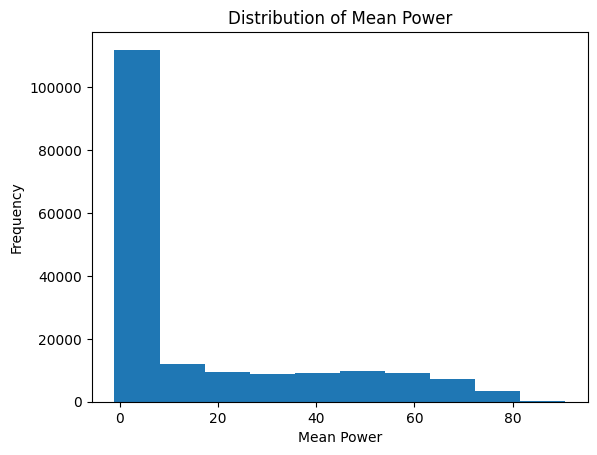

In [40]:
# Plot the data distribution
plt.hist(combined_data['MeanPower'], bins=10)  # Adjust the number of bins as needed
plt.xlabel('Mean Power')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Power')
plt.show()

In [34]:
import plotly.express as px

# Create a box plot of the mean data
fig = px.box(combined_data, y='MeanPower', title='Box Plot of Mean Power')
fig.update_layout(xaxis_title='Mean Power', yaxis_title='Value')
fig.show()


#wind data


## BASELINE MODEL

## 1. Setting up the dataset

In [51]:
SD = combined_data['MeanPower']
SD.head()

2020-02-29 23:45:00   -0.005348
2020-02-29 23:30:00   -0.005348
2020-02-29 23:15:00   -0.004913
2020-02-29 23:00:00   -0.005130
2020-02-29 22:45:00   -0.005261
Name: MeanPower, dtype: float64

In [44]:
SD.info()

<class 'pandas.core.series.Series'>
Index: 181052 entries, 2020-02-29 23:45:00 to 2019-03-10 02:45:00
Series name: MeanPower
Non-Null Count   Dtype  
--------------   -----  
181052 non-null  float64
dtypes: float64(1)
memory usage: 2.8+ MB


In [46]:
# Define the train, validation, and test set sizes
train_size = 0.9  # 90% of the data for training
test_size = 0.1 # 10% of the data for testing

# Calculate the indices for train, validation, and test sets
num_samples = len(SD)
train_index = int(train_size * num_samples)


# Split the dataset into train, validation, and test sets
train_data = SD.iloc[:train_index]
test_data = SD.iloc[train_index:]

In [47]:
train_data.head()

2020-02-29 23:45:00   -0.005348
2020-02-29 23:30:00   -0.005348
2020-02-29 23:15:00   -0.004913
2020-02-29 23:00:00   -0.005130
2020-02-29 22:45:00   -0.005261
Name: MeanPower, dtype: float64

In [50]:
# get the min value and max value of the train dataset
min_val = train_data.SD.min()
max_val = train_data.SD.max()

AttributeError: ignored

In [ ]:
print(min_val)
print(max_val)

In [ ]:
test_data.head()

In [ ]:
# convert the DateTime column to Unix time stamp
test_unix = test_data.copy()
# Convert DateTime column to Unix timestamp
test_unix['UnixTimestamp'] = test_unix['DateTime'].astype(int) // 10**9

# Drop the original DateTime column
test_unix = test_unix.drop('DateTime', axis=1)

test_unix.head()

In [ ]:
# convert the DateTime column to Unix time stamp
train_unix = train_data.copy()
# Convert DateTime column to Unix timestamp
train_unix['UnixTimestamp'] = train_unix['DateTime'].astype(int) // 10**9

# Drop the original DateTime column
train_unix = train_unix.drop('DateTime', axis=1)

train_unix.head()

## 2. Random Guessing Baseline model

In [19]:
class RandomGuessingModel:
    def __init__(self, min_value, max_value):
        self.min_value = min_value
        self.max_value = max_value

    def train(self, train_data):
        # No training is required for a random guessing model
        pass

    def predict(self, test_data):
        predictions = []
        for _ in test_data:
            random_value = random.uniform(self.min_value, self.max_value)
            predictions.append(random_value)
        return np.array(predictions)

In [20]:
# Create an instance of the RandomGuessingModel
model = RandomGuessingModel(min_value=min_val, max_value=max_val)

# Train the model (not needed for random guessing)
model.train(train_unix)

# Make predictions on the test data
predictions = model.predict(test_unix['UnixTimestamp'])

# Print the predictions
print(predictions)

[54.15604917 26.21358004 10.0570881  ...  3.05817677 54.12432806
 28.43099605]


### Evaluating the Baseline Random guessing model

In [21]:
test = test_unix['RealPower'].values

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Print the RMSE
print("RMSE:", rmse)

RMSE: 36.94832106776107


## 3. Average Baseline model

In [22]:
class AverageBaselineModel:
    def __init__(self):
        self.average = None

    def train(self, train_data):
        # Calculate the average of the target variable
        self.average = np.mean(train_data)

    def predict(self, test_data):
        # Create an array of the same length as test_data with the calculated average
        predictions = np.full(len(test_data), self.average)
        return predictions


In [23]:
# Create an instance of the AverageBaselineModel
model = AverageBaselineModel()

# Train the model by calculating the average
model.train((train_data["RealPower"].values))

# Make predictions on the test data
predictions = model.predict(test_unix['UnixTimestamp'])

# Print the predictions
print(predictions)

[12.82597908 12.82597908 12.82597908 ... 12.82597908 12.82597908
 12.82597908]


## Evaluating the Baseline Random guessing model

In [24]:
test = test_unix['RealPower'].values

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Print the RMSE
print("RMSE:", rmse)

RMSE: 17.96318619679876


https://meteostat.net/en/station/72290?t=2018-12-04/2018-12-04